In [21]:
import pandas as pd
import numpy as np
# from config import Config as cfg
# import pgOperation
import os
import json
# import dt
import re
import matplotlib.pyplot as plt
from PIL import Image


In [20]:
corp = (pd.read_csv('./corp_list.csv')['corporation']).to_list()
for i in corp:
    img = Image.open('./assets/' + i + '.png')
    # basewidth = 60
    # wpercent = (basewidth/float(img.size[0]))
    # hsize = int((float(img.size[1])*float(wpercent)))
    # img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    image = img.resize((56,69))
    print(img.size)
    image.save('./test/' + i + '.png')

(56, 69)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 688)
(558, 688)
(557, 688)
(557, 688)
(558, 688)
(557, 688)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 688)
(558, 688)
(557, 688)
(557, 688)
(558, 688)
(557, 688)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 687)
(558, 687)
(557, 687)
(557, 688)
(558, 688)
(557, 688)
(557, 688)
(558, 688)
(557, 688)
(557, 687)
(

In [66]:

ori = pd.read_csv('preprocess.csv')
ori['createtime'] = pd.to_datetime(ori['createtime'])
def getPlayerNumResult(df, player_num = 4):
    def expandDoubleCorp(df):
        pd.options.mode.chained_assignment = None
        df1 = df[df['doubleCorp'] == True]
        df2 = df[df['doubleCorp'] == True]
        df2['corporation'] = df2['corporation2']
        res = pd.concat([df1, df2],axis=0, ignore_index=True)
        res['count'] = 0.5
        return res
    df = df.loc[df['players'] == player_num].reset_index(drop=True)
    for i in range(1, player_num+1):
        player_idx = 'player'+str(i)
        player_df_pre = df[player_idx].apply(lambda x:eval(x))
        # print(player_idx)
        player_df = pd.json_normalize(player_df_pre).reset_index(drop=True)
        if i == 1:
            res = pd.concat([df,player_df.reindex(df.index)],axis=1)
            print((res.loc[pd.isna(res['player']) == False]).shape[0])
        else:
            mid = pd.concat([df,player_df.reindex(df.index)],axis=1)
            res = pd.concat([res, mid],axis=0, ignore_index=True)
            print((mid.loc[pd.isna(mid['player']) == False]).shape[0])
        # df = pd.concat([df, pd.json_normalize(df[player_idx])],axis=1)
    res.drop(['player'+str(i) for i in range(1, 7)], axis=1, inplace=True)
    res['count'] = 1
    res_single = res[~(res['doubleCorp'] == True)]
    res_double = expandDoubleCorp(res)
    res_final = pd.concat([res_single, res_double],axis=0, ignore_index=True)
    return res_final

player_ori = ori[ori['players'] == 4]


delete_list = {'界限突破': 'breakthrough', '阿瑞斯扩': 'aresExtension', '群友扩': 'erosCardsOption', '双公司': 'doubleCorp', '探路者扩': 'pathfindersExpansion'}
# game_options = st.multiselect("game options", delete_list.values())
# for i in delete_list.values():
#     exec("%s = st.checkbox('%s', value=True)"%(i,list(delete_list.keys())[list(delete_list.values()).index(i)]))

# for option in delete_list.values():
#     print(player_ori.shape[0])
#     if vars()[option] == True:
#         player_ori = player_ori[player_ori[option] == True]
#     elif vars()[option] == False:
player_ori = player_ori[(player_ori['aresExtension'] == False)|(pd.isna(player_ori['aresExtension']) == True)]

player_group = player_ori.groupby([pd.Grouper(key='createtime', freq='2W-SUN')])['generations'] \
    .mean() \
    .sort_index()
    # .reset_index() \



In [56]:
df9 = expandDoubleCorp(corp_df)

836
0


In [57]:
df9[df9['corporation'] != df9['corporation2']]

,game_id,players,generations,createtime,preludeExtension,venusNextExtension,coloniesExtension,turmoilExtension,boardName,showOtherPlayersVP,...,escapeVelocityThreshold,escapeVelocityPeriod,escapeVelocityPenalty,corporation,playerScore,player,order,position,userId,corporation2
0,g76da69ac86fd,4,7,2021-06-09 22:40:33,True,True,True,False,elysium,True,...,NaN,NaN,NaN,Robinson Industries (breakthrough),89,ryan,4,1,c5c6b6407bb7,Viron (breakthrough)
1,g5b7d94ca957b,4,6,2021-06-10 23:48:12,True,True,True,False,tharsis,True,...,NaN,NaN,NaN,Arcadian Communities (breakthrough),69,乙木,3,1,55ef2445c90c,UNMI (breakthrough)
2,g9b3bf824bbdd,4,9,2021-06-11 02:21:03,True,True,True,True,elysium,True,...,NaN,NaN,NaN,Factorum (breakthrough),115,乐,4,1,NaN,Pobolog (breakthrough)
3,g82bdfe687155,4,8,2021-06-11 18:23:24,True,False,False,False,elysium,True,...,NaN,NaN,NaN,CrediCor,77,碎愿,2,1,NaN,WG Parternship
4,g5a8c85067098,4,7,2021-06-11 19:05:55,True,True,True,True,tharsis,True,...,NaN,NaN,NaN,Tharsis_republic (breakthrough),82,火,2,1,NaN,Arcadian Communities (breakthrough)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,gb5c2609e9335,4,7,2022-02-11 19:51:51,True,True,True,False,random,True,...,30.0,2.0,1.0,Teractor (breakthrough),68,牧殇,2,4,a44c15b60f07,Valley Trust (breakthrough)
832,gff1a87f8d287,4,10,2022-02-12 16:23:21,True,False,False,False,tharsis,True,...,30.0,2.0,1.0,Labour Union,80,霞,2,4,NaN,Ecoline (breakthrough)
833,g775defddbc7c,4,8,2022-02-12 21:41:14,True,False,False,False,tharsis,True,...,NaN,NaN,NaN,UNMI (breakthrough),63,文,4,4,NaN,Hotsprings
834,ge2e3c056d24c,4,8,2022-02-12 23:35:39,True,False,False,False,elysium,True,...,30.0,2.0,1.0,Helion (breakthrough),57,文,1,4,NaN,United Nations Mission One


In [58]:
def expandDoubleCorp(df):
    pd.options.mode.chained_assignment = None
    df1 = df[df['doubleCorp'] == True]
    df2 = df[df['doubleCorp'] == True]
    df2['corporation'] = df2['corporation2']
    res = pd.concat([df1, df2],axis=0, ignore_index=True)
    res['count'] = 0.5
    return res

In [12]:
player_ori['player1']

0        {'corporation': 'Septem Tribus', 'playerScore'...
2        {'corporation': 'Thorgate (breakthrough)', 'pl...
5        {'corporation': 'Poseidon', 'playerScore': 99,...
8        {'corporation': 'Point Luna', 'playerScore': 8...
9        {'corporation': 'Philares', 'playerScore': 71,...
                               ...                        
13326    {'corporation': 'Point Luna', 'corporation2': ...
13327    {'corporation': 'Celestic', 'corporation2': ''...
13328    {'corporation': 'Celestic (breakthrough)', 'co...
13342    {'corporation': 'Tharsis Republic', 'corporati...
13346    {'corporation': 'PhoboLog', 'corporation2': ''...
Name: player1, Length: 2219, dtype: object

In [63]:
corp_df = getPlayerNumResult(player_ori, 4)

2219
2219
2219
2219


In [26]:
corp_df.columns

Index(['game_id', 'players', 'generations', 'createtime', 'preludeExtension',
       'venusNextExtension', 'coloniesExtension', 'turmoilExtension',
       'boardName', 'showOtherPlayersVP', 'customCorporationsList',
       'customColoniesList', 'promoCardsOption', 'heatFor', 'breakthrough',
       'startingCorporations', 'initialDraftVariant', 'randomMA',
       'shuffleMapOption', 'initialDraftRounds', 'cardsBlackList',
       'communityCardsOption', 'aresExtension', 'aresHazards',
       'requiresVenusTrackCompletion', 'moonExpansion', 'erosCardsOption',
       'politicalAgendasExtensionToggle', 'showCardsBlackList',
       'showColoniesList', 'randomMAToggle', 'doubleCorp',
       'initialCorpDraftVariant', 'pathfindersExpansion',
       'moonStandardProjectVariant', 'altVenusBoard', 'escapeVelocityMode',
       'escapeVelocityThreshold', 'escapeVelocityPeriod',
       'escapeVelocityPenalty', 'corporation', 'playerScore', 'player',
       'order', 'position', 'userId', 'corporation

In [67]:
corp = corp_df.groupby('corporation').agg(
    position = ('position', 'mean'),
    playerScore = ('playerScore', 'mean'),
    generations = ('generations', 'mean'),
    total = ('order', 'sum')
)

In [70]:
(corp.reset_index().sort_values('corporation')['corporation']).to_csv('./corp_list.csv')

In [3]:
player_group

createtime
2020-09-06    8.120000
2020-09-20    8.868421
2020-10-04    8.807692
2020-10-18    8.640000
2020-11-01    8.814815
2020-11-15    8.592593
2020-11-29    8.185185
2020-12-13    8.754209
2020-12-27    8.416667
2021-01-10    8.380952
2021-01-24    8.600000
2021-02-07    8.319444
2021-02-21    8.833333
2021-03-07    8.586667
2021-03-21    9.055556
2021-04-04    8.923077
2021-04-18    8.764706
2021-05-02    8.344444
2021-05-16    8.270000
2021-05-30    8.479452
2021-06-13    8.360656
2021-06-27    8.613333
2021-07-11    8.755556
2021-07-25    9.068182
2021-08-08    9.116667
2021-08-22    9.166667
2021-09-05    9.203704
2021-09-19    8.972973
2021-10-03    9.000000
2021-10-17    8.875000
2021-10-31    9.000000
2021-11-14    9.181818
2021-11-28    8.928571
2021-12-12    8.354839
2021-12-26    8.788462
2022-01-09    9.260870
2022-01-23    8.956522
2022-02-06    8.802198
2022-02-20    9.144928
Freq: 2W-SUN, Name: generations, dtype: float64

In [22]:
import config
import pgOperation
pg = pgOperation.PgOperation(cfg.PG_IP, cfg.PG_PORT, cfg.PG_USER, cfg.PG_PWD, cfg.PG_DB, cfg.PG_SCHEMA)


In [24]:
pg.readTable('estimate_customer_name').to_csv('用户数据.csv', index = False)

In [ ]:
res = pd.read_csv("game_results.csv")
# preprocessing
res["scores"] = res["scores"].astype(object)
res["game_options"] = res["game_options"].astype(object)
res["createtime"] = pd.to_datetime(res["createtime"], dayfirst=True)
store = []
for i in res["scores"]:
    tmp = json.loads(i)
    for i in range(len(tmp)):
        tmp[i]['order'] = i+1
    tmp = sorted(tmp,key = lambda e:e.__getitem__('playerScore'),reverse = True) # can optimize to obtain knowledge of order
    for i in range(len(tmp)):
        tmp[i]['position'] = i+1
    store.append(tmp)
df1 = pd.DataFrame(store)
df1.columns = ["player1","player2","player3","player4","player5","player6"]

options = []
for i in res["game_options"]:
    if not pd.isna(i):
        options.append(json.loads(i))
    else: options.append({})
df2 = pd.DataFrame(options)

df3 = pd.concat([res, df1, df2],axis=1)
df4= df3.drop(columns=['game_options','scores','draftVariant','corporateEra','solarPhaseOption','undoOption','fastModeOption','includeVenusMA','soloTR','removeNegativeGlobalEventsOption','politicalAgendasExtension','requiresMoonTrackCompletion','showTimers'])



In [ ]:
# # scores proprocessing
# store = []
# for i in res["scores"]:
#     tmp = json.loads(i)
#     for i in range(len(tmp)):
#         tmp[i]['order'] = i+1
#     tmp = sorted(tmp,key = lambda e:e.__getitem__('playerScore'),reverse = True) # can optimize to obtain knowledge of order
#     for i in range(len(tmp)):
#         tmp[i]['position'] = i+1
#     store.append(tmp)
# df1 = pd.DataFrame(store)
# df1.columns = ["player1","player2","player3","player4","player5","player6"]

In [ ]:
# options = []
# for i in res["game_options"]:
#     if not pd.isna(i):
#         options.append(json.loads(i))
#     else: options.append({})
# df2 = pd.DataFrame(options)

In [ ]:
# df3 = pd.concat([res, df1, df2],axis=1)
# df4= df3.drop(columns=['seed_game_id','game_options','scores','draftVariant','corporateEra','solarPhaseOption','undoOption','fastModeOption','includeVenusMA','soloTR','removeNegativeGlobalEventsOption','politicalAgendasExtension','requiresMoonTrackCompletion','showTimers','politicalAgendasExtensionToggle','aresHazards','requiresVenusTrackCompletion','politicalAgendasExtensionToggle','solarPhaseOption'])

In [ ]:
df3 = pd.concat([res, df1, df2],axis=1)
df4= df3.drop(columns=['game_options','scores','draftVariant','corporateEra','solarPhaseOption','undoOption','fastModeOption','includeVenusMA','soloTR','removeNegativeGlobalEventsOption','politicalAgendasExtension','requiresMoonTrackCompletion','showTimers'])

In [ ]:
df4.to_csv('preprocess.csv', index=False)

In [10]:
user = pd.read_csv('user.csv')

In [11]:
user

,id,name,createtime
0,aa7fb2dab16e,Angel,23/6/2020 10:23:54
1,f809d54498c,友人,28/6/2020 07:47:51
2,aadd564e80f4,传说中的肥羊,29/6/2020 16:49:17
3,c82433ca5ee7,一直,3/7/2020 20:12:16
4,1b736baf443a,NoswordKnight,6/7/2020 20:28:55
...,...,...,...
2565,b1167ae32b42,ryan.l,16/2/2022 10:57:48
2566,c389910194c5,琴酒,16/2/2022 15:33:41
2567,87c9ccf6dce7,sugar ga,16/2/2022 15:34:55
2568,a95a7e1aea8f,zero0,16/2/2022 15:34:08


In [12]:
user['user_name'] = user['name']
user['is_id'] = 1

In [13]:
user = user.loc[:,['name', 'user_name', 'is_id']]

In [14]:
user_csv = pd.read_csv('./player_mapping.csv')
user_csv['is_id'] = 0
user_csv.columns = user.columns

In [15]:
user_df = pd.concat([user,user_csv],axis=0).drop_duplicates(keep='first', inplace=False)

In [16]:
pg.writeDfToPg(user_df,'estimate_customer_name')

In [17]:
sql = '''
select player, times from
(select player, count(player) as times from 
(select *from public.estimate_p2
union all
select *from public.estimate_tfm) a
group by player
order by count(player) desc) as b
left join public.estimate_customer_name as c
on b.player = c.name
where c.name is null
'''
pg.readSql(sql).to_excel('./用户名缺失清单.xlsx', index=False)

In [18]:
df4.columns

Index(['game_id', 'players', 'generations', 'createtime', 'player1', 'player2',
       'player3', 'player4', 'player5', 'player6', 'preludeExtension',
       'venusNextExtension', 'coloniesExtension', 'turmoilExtension',
       'boardName', 'showOtherPlayersVP', 'customCorporationsList',
       'customColoniesList', 'promoCardsOption', 'heatFor', 'breakthrough',
       'startingCorporations', 'initialDraftVariant', 'randomMA',
       'shuffleMapOption', 'initialDraftRounds', 'cardsBlackList',
       'communityCardsOption', 'aresExtension', 'aresHazards',
       'requiresVenusTrackCompletion', 'moonExpansion', 'erosCardsOption',
       'politicalAgendasExtensionToggle', 'showCardsBlackList',
       'showColoniesList', 'randomMAToggle', 'doubleCorp',
       'initialCorpDraftVariant', 'pathfindersExpansion',
       'moonStandardProjectVariant', 'altVenusBoard', 'escapeVelocityMode',
       'escapeVelocityThreshold', 'escapeVelocityPeriod',
       'escapeVelocityPenalty'],
      dtype='obj

In [21]:
df4p = df4.loc[df4['players'] ==4]
df4pg = df4p.groupby([pd.Grouper(key='createtime', freq='2W-SUN')])['generations'] \
    .mean() \
    .reset_index() \
    .sort_values('createtime')
df_double = df4.loc[(df4['players'] ==4) & (df4['doubleCorp'] == True)]
df_doubleg = df_double.groupby([pd.Grouper(key='createtime', freq='2W-SUN')])['generations'] \
    .mean() \
    .reset_index() \
    .sort_values('createtime')
df_double = df4.loc[(df4['players'] ==4) & (df4['doubleCorp'] == True)]
df_doubleg = df_double.groupby([pd.Grouper(key='createtime', freq='2W-SUN')])['generations'] \
    .mean() \
    .reset_index() \
    .sort_values('createtime')
df8.plot(x="createtime", y="generations")

<AxesSubplot:xlabel='createtime'>

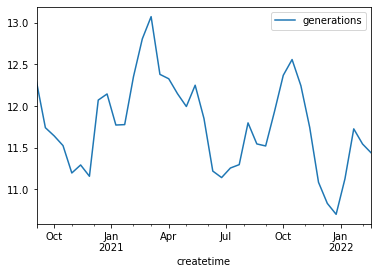

In [ ]:
plt.plot(df["Rank"], df["P75th"])

In [23]:
df44.columns

Index(['game_id', 'players', 'generations', 'createtime', 'player1', 'player2',
       'player3', 'player4', 'player5', 'player6', 'preludeExtension',
       'venusNextExtension', 'coloniesExtension', 'turmoilExtension',
       'boardName', 'showOtherPlayersVP', 'customCorporationsList',
       'customColoniesList', 'promoCardsOption', 'heatFor', 'breakthrough',
       'startingCorporations', 'initialDraftVariant', 'randomMA',
       'shuffleMapOption', 'initialDraftRounds', 'cardsBlackList',
       'communityCardsOption', 'aresExtension', 'aresHazards',
       'requiresVenusTrackCompletion', 'moonExpansion', 'erosCardsOption',
       'politicalAgendasExtensionToggle', 'showCardsBlackList',
       'showColoniesList', 'randomMAToggle', 'doubleCorp',
       'initialCorpDraftVariant', 'pathfindersExpansion',
       'moonStandardProjectVariant', 'altVenusBoard', 'escapeVelocityMode',
       'escapeVelocityThreshold', 'escapeVelocityPeriod',
       'escapeVelocityPenalty'],
      dtype='obj

<AxesSubplot:xlabel='createtime'>

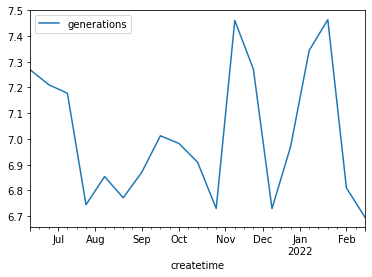

In [25]:
df44 = df4.loc[(df4['players'] ==4) & (df4['doubleCorp'] == True)]
df8 = df44.groupby([pd.Grouper(key='createtime', freq='2W-SUN')])['generations'] \
    .mean() \
    .reset_index() \
    .sort_values('createtime')
df8.plot(x="createtime", y="generations")

In [ ]:
def getPlayerNumResult(df, player_num = 4):
    df = df.loc[df['players'] == player_num].reset_index(drop=True)
    for i in range(1, player_num+1):
        player_idx = 'player'+str(i)
        # print(player_idx)
        player_df = pd.json_normalize(df[player_idx]).reset_index(drop=True)
        if i == 1:
            res = pd.concat([df,player_df.reindex(df.index)],axis=1)
            print((res.loc[pd.isna(res['player']) == False]).shape[0])
        else:
            mid = pd.concat([df,player_df.reindex(df.index)],axis=1)
            res = pd.concat([res, mid],axis=0, ignore_index=True)
            print((mid.loc[pd.isna(mid['player']) == False]).shape[0])
        # df = pd.concat([df, pd.json_normalize(df[player_idx])],axis=1)

    res.drop(['player'+str(i) for i in range(1, 7)], axis=1, inplace=True)
    return res

In [21]:
ff1 = getPlayerNumResult(df4, 4)

4198
4198
4198
4198


In [22]:
pg.writeDfToPg(ff1, cfg.TARGET_TABLE)

In [23]:
sql1 = '''
select
*
from (select corporation, avg("playerScore") as avg_score, avg(position) as avg_position, avg(generations) as avg_generations, count(position) as chosen_time from
(
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_tfm where corporation2 is not null
    union all
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation2 as corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_tfm where corporation2 is not null) as a
	group by corporation
) as b
order by avg_position
'''

In [ ]:
sql = '''

drop table if exists union_corp;
create temporary table union_corp as
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_tfm where corporation2 <> ''
    union all
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation2 as corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_tfm where corporation2 <> '';

drop table if exists avg_corp;
create temporary table avg_corp as
select
*
from (select corporation, avg("playerScore") as avg_score, avg(position) as avg_position, avg(generations) as avg_generations, count(position) as chosen_time from
union_corp as a
group by corporation
) as b;

drop table if exists baye_corp;
create temporary table baye_corp as
select
corporation, (avg_position*chosen_time + 2.5*50)/(chosen_time+50) as avg_position, chosen_time
from (select corporation, avg("playerScore") as avg_score, avg(position) as avg_position, avg(generations) as avg_generations, count(position) as chosen_time from
union_corp as a
group by corporation
) as b;


drop table if exists modify_union;
create temporary table modify_union as
SELECT 
a.game_id, 
a.players, 
a.generations, 
a.createtime, 
a."preludeExtension", 
a."venusNextExtension", 
a."coloniesExtension", 
a."turmoilExtension", 
a."boardName", 
a."showOtherPlayersVP", 
a."customCorporationsList", 
a."customColoniesList", 
a."promoCardsOption", 
a."heatFor", 
a.breakthrough, 
a."startingCorporations", 
a."initialDraftVariant", 
a."randomMA", 
a."shuffleMapOption", 
a."initialDraftRounds", 
a."cardsBlackList", 
a."communityCardsOption", 
a."aresExtension", 
a."aresHazards", 
a."requiresVenusTrackCompletion", 
a."moonExpansion", 
a."erosCardsOption", 
a."politicalAgendasExtensionToggle", 
a."showCardsBlackList", 
a."showColoniesList", 
a."randomMAToggle", 
a."doubleCorp", 
a."initialCorpDraftVariant", 
a."pathfindersExpansion", 
a."moonStandardProjectVariant", 
a."altVenusBoard", 
a."escapeVelocityMode", 
a."escapeVelocityThreshold", 
a."escapeVelocityPeriod", 
a."escapeVelocityPenalty", 
a.corporation, 
a."playerScore", 
a.player, 
a."order", 
a."position", 
a."userId",
a.corporation2,
2*b.avg_position  / (b.avg_position  + c.avg_position)  as corp1_position,
2*c.avg_position  / (b.avg_position + c.avg_position)  as corp2_position
-- 2*b.avg_position *b.chosen_time /(b.avg_position *b.chosen_time  + c.avg_position *c.chosen_time ) as corp1_position,
-- 2*c.avg_position *c.chosen_time  /(b.avg_position *b.chosen_time + c.avg_position *c.chosen_time ) as corp2_position
FROM public.estimate_tfm as a 
left join baye_corp as b
on a.corporation = b.corporation
left join baye_corp as c
on a.corporation2 = c.corporation
where a.corporation2 <> '';


-- drop table if exists modify_avg;
-- create temporary table modify_avg as
select
*
from (select corporation, avg(position) as avg_position, avg(modified_position) as modified_position,  avg("playerScore") as avg_score, avg(generations) as avg_generations, count(position) as chosen_time from
(   SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId", "position"*corp1_position as modified_position
	FROM modify_union where corporation2 <> ''
    union all
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation2 as corporation, "playerScore", player, "order", "position", "userId", "position"*corp2_position as modified_position
	FROM modify_union where corporation2 <> '') as a
group by corporation
) as b
order by modified_position;
select * from modify_union where corporation = 'Arcadian Communities';'''


In [24]:
union_df = pg.readSql(sql1)
union_df.to_csv('union_result.csv')

In [29]:
union_df = union_df.round(1)
union_df.columns = ['公司名称', '平均分数', '平均排位', '平均时代', '选择次数']
union_df.to_excel('双公司公司简单排序.xlsx', index=False)

In [12]:
ff1 = getPlayerNumResult(df4, 4)
ff2 = ff1.loc[pd.isna(ff1['player']) == False]

In [30]:
sql2 = '''
select player, count(position) as play_times, round(avg("playerScore"),2) as avg_score from
(
SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId", corporation2
	FROM public.estimate_tfm where createtime > '2021-08-26') as a group by player
order by count(position) desc
'''

In [ ]:
sql3 = '''
select player, count(position) as play_times, round(avg(generations),2) as avg_gens, round(avg("playerScore"),2) as avg_score, round(avg(position),2) as position from 
(
SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId", corporation2
	FROM public.estimate_tfm where createtime > '2021-08-26') as a group by player
having count(position) > 8
order by avg(position)
'''

In [31]:
p2 = getPlayerNumResult(df4, 2)

5336
5336


In [32]:
pg.writeDfToPg(p2, 'estimate_p2')

In [33]:
sql4 = '''
select
*
from (select corporation, avg("playerScore") as avg_score, avg(position) as avg_position, avg(generations) as avg_generations, count(position) as chosen_time from
(
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_p2 where corporation2 is not null
    union all
    SELECT game_id, players, generations, createtime, "preludeExtension", "venusNextExtension", "coloniesExtension", "turmoilExtension", "boardName", "showOtherPlayersVP", "customCorporationsList", "customColoniesList", "promoCardsOption", "heatFor", breakthrough, "startingCorporations", "initialDraftVariant", "randomMA", "shuffleMapOption", "initialDraftRounds", "cardsBlackList", "communityCardsOption", "aresExtension", "aresHazards", "requiresVenusTrackCompletion", "moonExpansion", "erosCardsOption", "politicalAgendasExtensionToggle", "showCardsBlackList", "showColoniesList", "randomMAToggle", "doubleCorp", "initialCorpDraftVariant", "pathfindersExpansion", "moonStandardProjectVariant", "altVenusBoard", "escapeVelocityMode", "escapeVelocityThreshold", "escapeVelocityPeriod", "escapeVelocityPenalty", corporation2 as corporation, "playerScore", player, "order", "position", "userId"
	FROM public.estimate_p2 where corporation2 is not null) as a
	group by corporation
) as b
order by avg_position
'''


In [34]:
union_df = pg.readSql(sql4)
union_df.to_csv('union_result_2p.csv')

In [35]:
union_df = union_df.round(1)
union_df.columns = ['公司名称', '平均分数', '平均排位', '平均时代', '选择次数']
union_df.to_excel('双公司2p简单排序.xlsx', index=False)

In [15]:
ff2 = ff2.loc[ff2['position'] == 1]

In [16]:
ff3 = ff2.groupby('player').agg(sum)
ff3 = ff3.sort_values('position',ascending=False).reset_index().drop(['players','initialDraftRounds','order'], axis=1)

In [17]:
ff3.columns

Index(['player', 'generations', 'playerScore', 'position'], dtype='object')

In [18]:
ff3.loc[:,['generations', 'playerScore']] = ff3[['generations', 'playerScore']].div(ff3.position, axis=0)

In [139]:
ff3.round(1).rename({'position' : 'times'}, inplace = False)

,player,generations,playerScore,position
0,钝钝,8.9,100.3,36.0
1,霞,9.0,82.3,25.0
2,阿尔,8.7,99.1,23.0
3,乙木,8.3,113.4,15.0
4,ddxy,8.1,90.6,15.0
...,...,...,...,...
341,姜松尚,10.0,131.0,1.0
342,姥爷,8.0,69.0,1.0
343,dz,9.0,118.0,1.0
344,宵暗,8.0,97.0,1.0


In [19]:
df5 = df4.loc[df4['players'] == 4].reset_index(drop=True)

df7 = pd.json_normalize(df5['player1']).reset_index(drop=True)
df8 = pd.concat([df5,df7.reindex(df5.index)],axis=1)
df8.loc[pd.isna(df8['player']) == False]


,game_id,players,generations,createtime,player1,player2,player3,player4,player5,player6,...,escapeVelocityThreshold,escapeVelocityPeriod,escapeVelocityPenalty,corporation,playerScore,player,order,position,userId,corporation2
0,f7cbeb6cc687,4,8,2020-08-31 15:05:21,"{'corporation': 'Septem Tribus', 'playerScore'...","{'corporation': 'Valley Trust (breakthrough)',...","{'corporation': 'Teractor (breakthrough)', 'pl...","{'corporation': 'Poseidon', 'playerScore': 69,...",None,None,...,NaN,NaN,NaN,Septem Tribus,111.0,育亮,2.0,1.0,NaN,NaN
2,ff2c9f3f3e45,4,8,2020-08-31 15:05:21,"{'corporation': 'Thorgate (breakthrough)', 'pl...","{'corporation': 'Teractor (breakthrough)', 'pl...","{'corporation': 'Inventrix (breakthrough)', 'p...","{'corporation': 'Mining guild (breakthrough)',...",None,None,...,NaN,NaN,NaN,Poseidon,99.0,一直,2.0,1.0,NaN,NaN
5,39debb03ba72,4,9,2020-08-31 15:05:21,"{'corporation': 'Poseidon', 'playerScore': 99,...","{'corporation': 'Factorum (breakthrough)', 'pl...","{'corporation': 'Manutech', 'playerScore': 73,...","{'corporation': 'Point Luna', 'playerScore': 6...",None,None,...,NaN,NaN,NaN,Recyclon (breakthrough),75.0,业问,3.0,1.0,NaN,NaN
8,b839cdd97347,4,8,2020-08-31 15:05:21,"{'corporation': 'Point Luna', 'playerScore': 8...","{'corporation': 'Utopia Invest', 'playerScore'...","{'corporation': 'Arcadian Communities', 'playe...","{'corporation': 'Septem Tribus', 'playerScore'...",None,None,...,NaN,NaN,NaN,Celestic (breakthrough),110.0,r神,4.0,1.0,NaN,NaN
9,238d1ff5856f,4,7,2020-08-31 15:05:21,"{'corporation': 'Philares', 'playerScore': 71,...","{'corporation': 'Point Luna', 'playerScore': 6...","{'corporation': 'Lakefront Resorts', 'playerSc...","{'corporation': 'Mining guild (breakthrough)',...",None,None,...,NaN,NaN,NaN,Thorgate (breakthrough),78.0,一直,3.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,ge593c1cf11fd,4,9,2021-04-03 01:34:40,{'corporation': 'Terralabs Research (breakthro...,"{'corporation': 'Junk Ventures', 'playerScore'...","{'corporation': 'Septem Tribus', 'playerScore'...",{'corporation': 'MorningStar Inc (breakthrough...,None,None,...,NaN,NaN,NaN,Teractor (breakthrough),75.0,阿尔,2.0,1.0,e17f4b9cc1e8,Ringcom
4193,gb2d0d7a3e238,4,8,2021-04-03 02:17:09,"{'corporation': 'Factorum (breakthrough)', 'pl...","{'corporation': 'UNMI (breakthrough)', 'player...","{'corporation': 'Thorgate (breakthrough)', 'pl...","{'corporation': 'Vitor', 'playerScore': 44, 'p...",None,None,...,NaN,NaN,NaN,Labour Union,90.0,ixa,4.0,1.0,7506d14c7c78,Tharsis_republic (breakthrough)
4194,gfcc5506067b5,4,9,2021-04-03 03:02:29,"{'corporation': 'Saturn Systems', 'playerScore...","{'corporation': 'Aristarchus', 'playerScore': ...","{'corporation': 'Pharmacy Union', 'playerScore...","{'corporation': 'Valley Trust (breakthrough)',...",None,None,...,NaN,NaN,NaN,Tharsis Republic,78.0,Yellow,2.0,1.0,NaN,
4195,g2abd6ddfa965,4,8,2021-04-03 13:16:53,"{'corporation': 'Arklight', 'playerScore': 94,...","{'corporation': 'Poseidon', 'playerScore': 87,...","{'corporation': 'Inventrix', 'playerScore': 51...","{'corporation': 'CrediCor', 'playerScore': 46,...",None,None,...,NaN,NaN,NaN,Trade Navigator,92.0,kriko,4.0,1.0,d7a8331bffda,Pobolog (breakthrough)


In [21]:
df5 = pd.concat([df4, pd.json_normalize(df4['player1']), pd.json_normalize(df4['player2']), pd.json_normalize(df4['player3']), pd.json_normalize(df4['player4'])],axis = 1)

AttributeError: 'NoneType' object has no attribute 'items'

In [11]:
def getPlayer(df,num): # get all players name
    player_df = pd.DataFrame(columns=['player','count'])
    for index,i in df.iterrows():
        if i['players'] == num: #start
            for column in ['player1','player2','player3','player4']:
                player_df.loc[player_df.shape[0]] = [i[column]['player'].lower().strip(),1]
    ff1 = player_df.groupby(player_df["player"]).count()
    ff1["player_list"] = ff1.values.tolist()
    return ff1


In [12]:
player_count = getPlayer(df4,4)
player_count.to_csv('./pl_count.csv', index = True)

KeyboardInterrupt: 

In [ ]:
def playerCount(df,num,player): #TODO,模糊查找
    player_df = pd.DataFrame(columns=['id','corporation1', 'rank', 'order','score', 'time', 'generations','corporation2'])
    for index,i in df.iterrows():
        if i['players'] == num: #start
            for column in ['player1','player2','player3','player4']:
                if i[column]['player'].lower() in [p.lower() for p in player] and ('corporation2' not in i[column].keys()):
                    player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],'nan']
                elif i[column]['player'].lower() in [p.lower() for p in player] and ('corporation2' in i[column].keys()):
                    player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],i[column]['corporation2']]
    return player_df

In [ ]:
df_player = playerCount(df4,4,['梦韩'])
df_player.tail()

In [ ]:
#time series
def time_series(df):
    ff1 = df[(df["players"]==4) & (df["generations"]<=9)]
    ff1.to_csv('./time_original', index = True)
    ff2 = ff1.groupby(ff1['createtime'].dt.date).mean()
    return ff2


In [ ]:
# # 时间绘图
# df5 = time_series(df4)
# df5.head(20)
# df5 = df5.drop(columns=["players","initialDraftRounds"])
# df5.to_csv('./time_series.csv', index = True)
# # df5.plot()

# US_RESULT

In [ ]:
# usage: demostrate user's creating time, like "you are the NO.1132 player"
user = pd.read_csv("users.csv")
user = user.drop(columns="prop")
user["name"] = user["name"].str.lower()
user["createtime"] = pd.to_datetime(user["createtime"], dayfirst=True)
user = user.sort_values(by=["createtime"])
user = user.reset_index(drop=True)
user["createtime"] = user.index+1
user.to_csv('./user_pre.csv', index = False)

In [ ]:
# left join and mapping
user_player = user.merge(player_count,how="left",left_on="name",right_on="player")
user_player = user_player.sort_values(by=["player_list"],na_position="first")
user_player.to_csv('./user_player_mapping1.csv', index = False)


In [ ]:
user_player = pd.read_csv('./user_player_mapping.csv')
user_player = user_player.drop(columns="player_list")
user_player = user_player.set_index("name")
user_player.tail()

In [ ]:
# detect missing user name
player_user = player_count.merge(user,how="left",left_on="player",right_on="name")
player_user = player_user.sort_values(by=["count"],ascending=False, na_position="first")
player_user = player_user[player_user["name"].isna()]
player_user.to_csv('./player_user_mapping.csv', index = False)

# CUSTOMIZATION

In [ ]:
player_mapping_df = pd.read_csv('player_mapping.csv')
player_mapping_df = player_mapping_df.set_index("playername")

In [ ]:
def playerGroup(df,num,player,map_df): #TODO,模糊查找
    player_df = pd.DataFrame(columns=['id','corporation1', 'rank', 'order','score', 'time', 'generations','corporation2'])
    for index,i in df.iterrows():
        try:
            if i['players'] == num: #start
                for column in ['player1','player2','player3','player4']:
                    if (i[column]['player'].lower() == player.lower() or i[column]['player'].lower() in map_df.index) and ('corporation2' not in i[column].keys()):
                        if map_df.loc[i[column]['player'].lower(),'username']== player.lower():
                            player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],'nan']
                    elif (i[column]['player'].lower() == player.lower() or i[column]['player'].lower() in map_df.index) and ('corporation2' in i[column].keys()):
                        if map_df.loc[i[column]['player'].lower(),'username']== player.lower():
                            player_df.loc[player_df.shape[0]] = [i[column]['player'].lower(),i[column]['corporation'],i[column]['position'],i[column]['order'],i[column]['playerScore'],i['createtime'],i['generations'],i[column]['corporation2']]
        except: print(player)
    return player_df

In [ ]:
user_df = playerGroup(df4,4,'梦韩',player_mapping_df)
user_df.tail()

In [ ]:
group_by_corp = user_df.groupby(['corporation1']).agg({'id':'count','rank':'mean','score':'mean','generations':'mean'}).sort_values(by=['id'], ascending=False)

user_df["hour"] = user_df.time.apply(lambda x: x.hour)
group_by_hour = user_df.groupby(['hour']).agg({'id':'count','rank':'mean','score':'mean','generations':'mean'}).sort_values(by=['id'], ascending=False)
group_by_hour.reset_index().loc[0,'hour']
highest = user_df.sort_values(by=["score","generations"],ascending=[False,True])
# highest.head()


In [ ]:
user_df.to_csv('钝钝.csv',index=False)

In [ ]:
# test
firstgame = user_df.loc[0,["corporation1","rank","time"]]
user_df["date"] = user_df["time"].dt.normalize()
group_by_date = user_df.groupby(['date']).agg({'id':'count'}).sort_values(by=['id'], ascending=False)
group_by_date = group_by_date[group_by_date["id"]<=7]
# group_by_date.reset_index().head()

In [ ]:
def user_summary(ff1,ff2,user): ## ff1=df4
    try:
        user_df = playerGroup(ff1,4,user,player_mapping_df)
    except:
        print(user)
        return 0
    # measure 0: check whether the account is uesable
    if user_df.empty: return [''for i in range(18)]
    if pd.isna(ff2.loc[user,"createtime"].astype("int")): return [''for i in range(18)]
    # measure 1: account create date
    createtime = ff2.loc[user,"createtime"]
    # measure 1.5: first game
    firstgame = user_df.loc[0,["corporation1","rank","time"]]
    # measure 1.6 spend how many days, defeat ?% users
    # measure 2: total games, favourite corp
    group_by_corp = user_df.groupby(['corporation1']).agg({'id':'count','rank':'mean','score':'mean','generations':'mean'}).sort_values(by=['id'], ascending=False)
    group_by_corp = group_by_corp.reset_index()
    favorite_corp = group_by_corp.loc[0,'corporation1']
    favourite_corp_rank = group_by_corp.loc[0,'rank']
    favorite_corp_times = group_by_corp.loc[0,'id']
    games = user_df.shape[0]
    # measure 3: most frequently play time period
    user_df["hour"] = user_df.time.apply(lambda x: x.hour)
    group_by_hour = user_df.groupby(['hour']).agg({'id':'count','rank':'mean','score':'mean','generations':'mean'}).sort_values(by=['id'], ascending=False)
    most_freq_time = group_by_hour.reset_index().loc[0,'hour']
    # measure 4: avg score and gen, i.e. defeat 96% players (display this if the ratio > 50) TODO
    avg_rank = user_df["rank"].mean()
    avg_gens = user_df["generations"].mean()
    # measure 5: highest score, with which corp
    # highest = pd.to_numeric(user_df["score"]).idxmax()
    highest = user_df.sort_values(by=["score","generations"],ascending=[False,True])
    highest_corp = highest.iloc[0,1]
    highest_score = highest.iloc[0,4]
    highest_gens = highest.iloc[0,6]
    if (highest.iloc[0,7] != 'nan' and highest.iloc[0,7] != ''):
        highest_corp = highest_corp+' 和 '+highest.iloc[0,7]
    # measure 6: group by day. i.e 2021-06-10 seems to be a special day for u, u played 6 games by a row
    user_df["date"] = user_df["time"].dt.normalize()
    group_by_date = user_df.groupby(['date']).agg({'id':'count'}).sort_values(by=['id'], ascending=False)
    group_by_date = group_by_date[group_by_date["id"]<=7]
    played_day = group_by_date.shape[0]
    group_by_date = group_by_date.reset_index()
    most_day = group_by_date.loc[0,["date","id"]]
    # print([user, firstgame[0],firstgame[1],firstgame[2],createtime, games,favorite_corp,favorite_corp_times,most_freq_time,avg_rank,avg_gens, highest_corp, highest_score,highest_gens,played_day,most_day[0], most_day[1]])
    return [user, firstgame[0],firstgame[1],firstgame[2],createtime, games,favorite_corp,favorite_corp_times,favourite_corp_rank,most_freq_time,avg_rank,avg_gens, highest_corp, highest_score,highest_gens,played_day,most_day[0], most_day[1]]

In [ ]:
def measure_summary(ff1,ff2):
    output_df = pd.DataFrame(columns=["user_id","first_corp","first_rank","first_time","create_no","total_games","favorite_corp","fa_corp_times","fa_corp_rank","most_freq_play_time","avg_rank","avg_gens","highest_corp","highest_score","highest_gens","played_day","most_date","most_date_times"])
    for index,i in user_player.iterrows():
        # print(index)
        if (not pd.isnull(i["count"])) and i["count"]>=1 and (("tour" in index) == False):
            output_df.loc[output_df.shape[0]] = user_summary(ff1,ff2,index)
    return output_df

In [ ]:
# def measure_summary(ff1,ff2):
#     output_df = pd.DataFrame(columns=["user_id"])
#     for index,i in user_player.iterrows():
#         output_df.loc[output_df.shape[0]] = [i]
#     return output_df
# test = measure_summary(df4,user_player)
# test = test.dropna()
# test.to_csv("test.csv")

In [ ]:
output_df = measure_summary(df4,user_player)
output_df = output_df.dropna()
output_df.to_csv("measure_summary.csv")
output_df.head()

In [ ]:
output_df = pd.read_csv("measure_summary.csv")
# preprocessing
output_df = output_df[output_df["user_id"].str.contains("tour-")==False]
# play times
output_df = output_df.sort_values(by="total_games",ascending=False)
output_df['play_times_sort'] = range(1,len(output_df)+1)
# gens
output_df = output_df.sort_values(by="avg_gens",ascending=False)
output_df['gens_sort'] = range(1,len(output_df)+1)
# terraform
output_df = output_df.sort_values(by="avg_gens")
output_df['terra_sort'] = range(1,len(output_df)+1)
# terraform
output_df = output_df.sort_values(by="highest_score",ascending=False)
output_df['highest_sort'] = range(1,len(output_df)+1)
# rank
output_df["bayes_rank"] = output_df.apply(lambda x:(x["total_games"]*x["avg_rank"]+10*2.8)/(x["total_games"]+10),axis=1)
output_df = output_df.sort_values(by="bayes_rank")
output_df['rank_sort'] = range(1,len(output_df)+1)
# analyze corp ranking TODO: group by corp,ignore 'breakthrough', then find the index with the maximum values
output_df['baye_avg'] = output_df.apply(lambda x:(x["fa_corp_times"]*x["fa_corp_rank"]+5*2.5)/(x["fa_corp_times"]+5),axis=1)
output_df['max_corp'] = output_df.groupby(["favorite_corp"],as_index=False)["baye_avg"].transform(min)
output_df['max_corp'] = np.where((output_df["max_corp"]==output_df["baye_avg"]) & (output_df["baye_avg"] <= 2.5),1,0)
# output_pivot = pd.pivot_table(output_df, index=[''])
# output_df.sort_values(by="baye_avg").groupby(["favorite_corp"],as_index=False).transform(lambda x: x in range(1,len(output_df)+1))


output_df = output_df.sort_values(by="bayes_rank")
output_df.to_csv("measure_summary_sort.csv")
output_df.head()

In [ ]:
# final json file
final_df = pd.read_csv("measure_summary_sort.csv")
# entity modification
final_df[["create_no","played_day","total_games","fa_corp_times","most_freq_play_time","highest_score","highest_gens","most_date_times"]] = final_df[["create_no","played_day","total_games","fa_corp_times","most_freq_play_time","highest_score","highest_gens","most_date_times"]].astype(np.int32)
final_df["avg_rank"] = final_df["avg_rank"].round(1)
final_df["avg_gens"] = final_df["avg_gens"].round(1)
final_df[["create_time_text","first_game_text","total_game_text","favorite_corp_text","favorite_time_text","avg_rank_text","avg_gen_text","best_score_text","games_in_one_day_text","achievements"]] = final_df.apply(lambda x:('','','','','','','','','','',),axis=1,result_type='expand')
# for loop
for i,row in final_df.iterrows():
    # 1, user_id, TODO make it to be index, create_no, create_time_text
    if final_df.loc[i,"create_no"] <= 100: final_df.loc[i,"create_time_text"] = "作为登陆火星的先行者，你们为火星的建设奠定了坚实的基础！"
    elif final_df.loc[i,"create_no"] <= 805: final_df.loc[i,"create_time_text"] = "作为火星的第二批居民，你们牵引了无数小行星让火星不再孤寂寒冷。"
    else: final_df.loc[i,"create_time_text"] = "作为火星的新兴势力，感谢你们为火星增添了几分绿意！"

    # 2, first_time, first_game_text
    date_str = final_df.loc[i,"first_time"]
    final_df.loc[i,"first_time"] = date_str[0:4]+'年'+date_str[5:7]+'月'+date_str[8:10]+'日'
    if final_df.loc[i,"first_rank"].astype(np.int32) == 1: final_df.loc[i,"first_game_text"] = "崭露头角，轻取桂冠"
    elif final_df.loc[i,"first_rank"].astype(np.int32) == 2: final_df.loc[i,"first_game_text"] = "小试牛刀，施精布略"
    elif final_df.loc[i,"first_rank"].astype(np.int32) == 3: final_df.loc[i,"first_game_text"] = "初出茅庐，志在千里"
    elif final_df.loc[i,"first_rank"].astype(np.int32) == 4: final_df.loc[i,"first_game_text"] = "愈战愈勇，砥砺前行"

    # 3, played_day, total_games, total_game_text
    if final_df.loc[i,"total_games"].astype(np.int32) <= 10: final_df.loc[i,"total_game_text"] = "火星好寂寞，下次记得多陪陪人家~"
    elif final_df.loc[i,"total_games"].astype(np.int32) <= 60: final_df.loc[i,"total_game_text"] = "虽然玩得不多，但是改造委员会看到了你的诚意！"
    elif final_df.loc[i,"total_games"].astype(np.int32) <= 120: final_df.loc[i,"total_game_text"] = "改造委员会宣布你是火星年度劳模！"
    else: final_df.loc[i,"total_game_text"] = "地球办公室向你颁发感动火星十大人物证书！"

    # 4, favorite_corp, fa_corp_times
    if final_df.loc[i,"fa_corp_times"].astype(np.int32) >= 10: final_df.loc[i,"favorite_corp_text"] = "日久生情，想必彼此之间已经有羁绊了吧！"
    else: final_df.loc[i,"favorite_corp_text"] = "不要忘记和他一起度过的愉快生活哦~"

    # 5, most_freq_play_time, favorite_time_text
    if final_df.loc[i,"most_freq_play_time"].astype(np.int32) <= 14 and final_df.loc[i,"most_freq_play_time"].astype(np.int32) >= 7: final_df.loc[i,"favorite_time_text"] = "早起的火星人有牌抽！"
    elif final_df.loc[i,"most_freq_play_time"].astype(np.int32) <= 21 and final_df.loc[i,"most_freq_play_time"].astype(np.int32) > 14: final_df.loc[i,"favorite_time_text"] = "真是元气满满的火星人呢"
    else: final_df.loc[i,"favorite_time_text"] = "什么？还有不要睡觉的火星人？你是来自木星的吗？"

    # 6, avg_rank, avg_rank_text
    if final_df.loc[i,"avg_rank"] <= 2: final_df.loc[i,"avg_rank_text"] = "你是出色的技术流！世界政府需要你这样的人才！"
    elif final_df.loc[i,"avg_rank"] <= 3: final_df.loc[i,"avg_rank_text"] = "运气总是起起落落落落落落，我懂你！"
    elif final_df.loc[i,"avg_rank"] <= 4: final_df.loc[i,"avg_rank_text"] = "别灰心！4个人里面只有1个人垫底！"

    # 7, avg_gens, avg_gen_text
    if final_df.loc[i,"avg_gens"] <= 7.2: final_df.loc[i,"avg_gen_text"] = "你是纯纯粹粹的改造党，火卫二不在的第N天，想她"
    elif final_df.loc[i,"avg_gens"] <= 8: final_df.loc[i,"avg_gen_text"] = "你改造拖拖两开花，进可过牌变魔术，退可标动打工人"
    else: final_df.loc[i,"avg_gen_text"] = "你是如假包换的老拖拖，请问AI中心研究的反重力科技成果怎么样了？"

    # 8, highest_corp,highest_score,highest_gens
    if final_df.loc[i,"highest_sort"].astype(np.int32) <= 50: final_df.loc[i,"best_score_text"] = "火星吉尼斯纪录应该留下你的名字！"
    elif final_df.loc[i,"highest_sort"].astype(np.int32) <= 100: final_df.loc[i,"best_score_text"] = "金星总督向你发来祝贺。"
    else: final_df.loc[i,"best_score_text"] = "再接再厉！没事多去研究前哨所转转！"

    # 9 most_date,most_date_times
    date_str = final_df.loc[i,"first_time"]
    final_df.loc[i,"most_date"] = date_str[0:4]+'年'+date_str[5:7]+'月'+date_str[8:10]+'日'
    if final_df.loc[i,"most_date_times"].astype(np.int32) <= 1: final_df.loc[i,"games_in_one_day_text"] = "哦，原来最多也只是开了一局啊，那没事了。"
    elif final_df.loc[i,"most_date_times"].astype(np.int32) <= 3: final_df.loc[i,"games_in_one_day_text"] = "时间管理大师非你莫属！"
    else: final_df.loc[i,"games_in_one_day_text"] = "火星996说的就是你吧！"

    # achievements: play_times_sort,gens_sort,terra_sort,highest_sort,bayes_rank,rank_sort,baye_avg,max_corp
    mapping = ['零','一','二','三','四','五','六','七','八','九','十']
    operated_str = ''
    if final_df.loc[i,"play_times_sort"] <= 10: operated_str = operated_str+("国服第"+mapping[final_df.loc[i,"play_times_sort"]]+"肝帝\n")
    if final_df.loc[i,"gens_sort"] <= 10: operated_str = operated_str+("国服第"+mapping[final_df.loc[i,"gens_sort"]]+"拖拖党\n")
    if final_df.loc[i,"terra_sort"] <= 10: operated_str = operated_str+("国服第"+mapping[final_df.loc[i,"terra_sort"]]+"改造党\n")
    if final_df.loc[i,"rank_sort"] <= 10: operated_str = operated_str+("年度第"+mapping[final_df.loc[i,"rank_sort"]]+"综合实力\n")
    if final_df.loc[i,"max_corp"] == 1: operated_str = operated_str+("国服最强"+final_df.loc[i,"favorite_corp"]+"\n")

    if operated_str == '': 
        final_df.loc[i,"achievements"] = "火星打工人"
    else:
        final_df.loc[i,"achievements"] = operated_str
final_df.to_csv("measure_output.csv")
# final_df.head()

In [ ]:
final_df = final_df.loc[:,["user_id", "create_no", "create_time_text",  "first_time", "first_corp", "first_game_text", "played_day", "total_games", "total_game_text", "favorite_corp", "fa_corp_times", "fa_corp_rank", "most_freq_play_time", "favorite_time_text", "avg_rank", "avg_rank_text", "avg_gens", "avg_gen_text", "highest_corp", "highest_score", "highest_gens", "highest_sort","most_date", "most_date_times", "games_in_one_day_text", "achievements"]]

In [ ]:
json_df = final_df.set_index("user_id", drop=True)
json_df.head()
json_df.to_csv("summary.csv")
result = json_df.to_json(open("json_data7.json","w",encoding="utf-8"), orient="index", force_ascii=False)